In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
accuracy=[]
model=[]

In [2]:
mh_data=pd.read_excel('../data/Mental disorder symptoms.xlsx')

In [3]:
mh_data.head(10)

,ag+1:629e,feeling.nervous,panic,breathing.rapidly,sweating,trouble.in.concentration,having.trouble.in.sleeping,having.trouble.with.work,hopelessness,anger,...,having.nightmares,avoids.people.or.activities,feeling.negative,trouble.concentrating,blamming.yourself,hallucinations,repetitive.behaviour,seasonally,increased.energy,Disorder
0,23,1,0,1,0,0,1,0,1,0,...,0,0,1,0,0,0,0,0,0,MDD
1,14,1,0,1,0,0,1,0,0,1,...,1,1,0,0,0,0,1,0,0,ASD
2,25,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Loneliness
3,29,1,0,0,0,1,1,0,0,0,...,0,0,0,1,1,0,0,0,1,bipolar
4,32,1,1,1,1,1,1,1,0,0,...,0,1,0,0,0,0,0,0,0,anexiety
5,40,1,1,1,1,1,1,0,0,1,...,1,0,0,0,1,0,1,0,0,PTSD
6,18,0,0,0,0,0,1,1,0,0,...,0,0,0,1,0,0,0,0,0,sleeping disorder
7,32,1,0,1,0,1,1,1,1,0,...,0,1,1,1,0,1,0,0,0,psychotic deprission
8,24,1,1,1,0,1,0,0,0,0,...,0,1,0,1,0,0,1,0,0,ASD
9,37,1,0,1,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,eating disorder


In [4]:
mh_data.shape

(637, 29)

In [5]:
mh_data.nunique()

ag+1:629e                      33
feeling.nervous                 2
panic                           2
breathing.rapidly               2
sweating                        2
trouble.in.concentration        2
having.trouble.in.sleeping      2
having.trouble.with.work        2
hopelessness                    2
anger                           2
over.react                      2
change.in.eating                2
suicidal.thought                2
feeling.tired                   2
close.friend                    2
social.media.addiction          2
weight.gain                     2
introvert                       2
popping.up.stressful.memory     2
having.nightmares               2
avoids.people.or.activities     2
feeling.negative                2
trouble.concentrating           2
blamming.yourself               2
hallucinations                  2
repetitive.behaviour            2
seasonally                      1
increased.energy                2
Disorder                       12
dtype: int64

In [6]:
mh_data.isna().sum()

ag+1:629e                      0
feeling.nervous                0
panic                          0
breathing.rapidly              0
sweating                       0
trouble.in.concentration       0
having.trouble.in.sleeping     0
having.trouble.with.work       0
hopelessness                   0
anger                          0
over.react                     0
change.in.eating               0
suicidal.thought               0
feeling.tired                  0
close.friend                   0
social.media.addiction         0
weight.gain                    0
introvert                      0
popping.up.stressful.memory    0
having.nightmares              0
avoids.people.or.activities    0
feeling.negative               0
trouble.concentrating          0
blamming.yourself              0
hallucinations                 0
repetitive.behaviour           0
seasonally                     0
increased.energy               0
Disorder                       0
dtype: int64

In [7]:
mh_data["age"]=mh_data["ag+1:629e"]

In [8]:
mh_data=mh_data.drop(["ag+1:629e"],axis=1)

In [9]:
mh_data.head()

,feeling.nervous,panic,breathing.rapidly,sweating,trouble.in.concentration,having.trouble.in.sleeping,having.trouble.with.work,hopelessness,anger,over.react,...,avoids.people.or.activities,feeling.negative,trouble.concentrating,blamming.yourself,hallucinations,repetitive.behaviour,seasonally,increased.energy,Disorder,age
0,1,0,1,0,0,1,0,1,0,0,...,0,1,0,0,0,0,0,0,MDD,23
1,1,0,1,0,0,1,0,0,1,1,...,1,0,0,0,0,1,0,0,ASD,14
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Loneliness,25
3,1,0,0,0,1,1,0,0,0,1,...,0,0,1,1,0,0,0,1,bipolar,29
4,1,1,1,1,1,1,1,0,0,0,...,1,0,0,0,0,0,0,0,anexiety,32


In [10]:
mh_data.describe()

,feeling.nervous,panic,breathing.rapidly,sweating,trouble.in.concentration,having.trouble.in.sleeping,having.trouble.with.work,hopelessness,anger,over.react,...,having.nightmares,avoids.people.or.activities,feeling.negative,trouble.concentrating,blamming.yourself,hallucinations,repetitive.behaviour,seasonally,increased.energy,age
count,637.000000,637.000000,637.000000,637.000000,637.000000,637.000000,637.000000,637.000000,637.000000,637.000000,...,637.000000,637.000000,637.000000,637.000000,637.000000,637.000000,637.000000,637.0,637.000000,637.000000
mean,0.638932,0.273155,0.549451,0.368917,0.365777,0.638932,0.273155,0.232339,0.324961,0.263736,...,0.329670,0.364207,0.340659,0.408163,0.244898,0.102041,0.288854,0.0,0.230769,22.189953
std,0.480688,0.445930,0.497940,0.482891,0.482026,0.480688,0.445930,0.422656,0.468728,0.441004,...,0.470463,0.481585,0.474303,0.491880,0.430365,0.302940,0.453586,0.0,0.421656,8.395680
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,4.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,16.000000
50%,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,21.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.0,0.000000,28.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,46.000000


In [11]:
mh_data.head()

,feeling.nervous,panic,breathing.rapidly,sweating,trouble.in.concentration,having.trouble.in.sleeping,having.trouble.with.work,hopelessness,anger,over.react,...,avoids.people.or.activities,feeling.negative,trouble.concentrating,blamming.yourself,hallucinations,repetitive.behaviour,seasonally,increased.energy,Disorder,age
0,1,0,1,0,0,1,0,1,0,0,...,0,1,0,0,0,0,0,0,MDD,23
1,1,0,1,0,0,1,0,0,1,1,...,1,0,0,0,0,1,0,0,ASD,14
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Loneliness,25
3,1,0,0,0,1,1,0,0,0,1,...,0,0,1,1,0,0,0,1,bipolar,29
4,1,1,1,1,1,1,1,0,0,0,...,1,0,0,0,0,0,0,0,anexiety,32


In [12]:
mh_data.dtypes

feeling.nervous                 int64
panic                           int64
breathing.rapidly               int64
sweating                        int64
trouble.in.concentration        int64
having.trouble.in.sleeping      int64
having.trouble.with.work        int64
hopelessness                    int64
anger                           int64
over.react                      int64
change.in.eating                int64
suicidal.thought                int64
feeling.tired                   int64
close.friend                    int64
social.media.addiction          int64
weight.gain                     int64
introvert                       int64
popping.up.stressful.memory     int64
having.nightmares               int64
avoids.people.or.activities     int64
feeling.negative                int64
trouble.concentrating           int64
blamming.yourself               int64
hallucinations                  int64
repetitive.behaviour            int64
seasonally                      int64
increased.en

In [13]:
mh_data.isna().sum()

feeling.nervous                0
panic                          0
breathing.rapidly              0
sweating                       0
trouble.in.concentration       0
having.trouble.in.sleeping     0
having.trouble.with.work       0
hopelessness                   0
anger                          0
over.react                     0
change.in.eating               0
suicidal.thought               0
feeling.tired                  0
close.friend                   0
social.media.addiction         0
weight.gain                    0
introvert                      0
popping.up.stressful.memory    0
having.nightmares              0
avoids.people.or.activities    0
feeling.negative               0
trouble.concentrating          0
blamming.yourself              0
hallucinations                 0
repetitive.behaviour           0
seasonally                     0
increased.energy               0
Disorder                       0
age                            0
dtype: int64

In [14]:
mh_data.columns

Index(['feeling.nervous', 'panic', 'breathing.rapidly', 'sweating',
       'trouble.in.concentration', 'having.trouble.in.sleeping',
       'having.trouble.with.work', 'hopelessness', 'anger', 'over.react',
       'change.in.eating', 'suicidal.thought', 'feeling.tired', 'close.friend',
       'social.media.addiction', 'weight.gain', 'introvert',
       'popping.up.stressful.memory', 'having.nightmares',
       'avoids.people.or.activities', 'feeling.negative',
       'trouble.concentrating', 'blamming.yourself', 'hallucinations',
       'repetitive.behaviour', 'seasonally', 'increased.energy', 'Disorder',
       'age'],
      dtype='object')

In [15]:
for col in mh_data.columns :
    print(col,"  ",mh_data[col].nunique())

feeling.nervous    2
panic    2
breathing.rapidly    2
sweating    2
trouble.in.concentration    2
having.trouble.in.sleeping    2
having.trouble.with.work    2
hopelessness    2
anger    2
over.react    2
change.in.eating    2
suicidal.thought    2
feeling.tired    2
close.friend    2
social.media.addiction    2
weight.gain    2
introvert    2
popping.up.stressful.memory    2
having.nightmares    2
avoids.people.or.activities    2
feeling.negative    2
trouble.concentrating    2
blamming.yourself    2
hallucinations    2
repetitive.behaviour    2
seasonally    1
increased.energy    2
Disorder    12
age    33


In [16]:
mh_data.describe()

,feeling.nervous,panic,breathing.rapidly,sweating,trouble.in.concentration,having.trouble.in.sleeping,having.trouble.with.work,hopelessness,anger,over.react,...,having.nightmares,avoids.people.or.activities,feeling.negative,trouble.concentrating,blamming.yourself,hallucinations,repetitive.behaviour,seasonally,increased.energy,age
count,637.000000,637.000000,637.000000,637.000000,637.000000,637.000000,637.000000,637.000000,637.000000,637.000000,...,637.000000,637.000000,637.000000,637.000000,637.000000,637.000000,637.000000,637.0,637.000000,637.000000
mean,0.638932,0.273155,0.549451,0.368917,0.365777,0.638932,0.273155,0.232339,0.324961,0.263736,...,0.329670,0.364207,0.340659,0.408163,0.244898,0.102041,0.288854,0.0,0.230769,22.189953
std,0.480688,0.445930,0.497940,0.482891,0.482026,0.480688,0.445930,0.422656,0.468728,0.441004,...,0.470463,0.481585,0.474303,0.491880,0.430365,0.302940,0.453586,0.0,0.421656,8.395680
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,4.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,16.000000
50%,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,21.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.0,0.000000,28.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,46.000000


In [17]:
from sklearn.preprocessing import LabelEncoder
disorder_column = mh_data['Disorder']
label_encoder = LabelEncoder()
encoded_values = label_encoder.fit_transform(disorder_column)
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
mh_data['Disorder'] = encoded_values

In [18]:
label_mapping

{'ADHD': 0,
 'ASD': 1,
 'Loneliness': 2,
 'MDD': 3,
 'OCD': 4,
 'PDD': 5,
 'PTSD': 6,
 'anexiety': 7,
 'bipolar': 8,
 'eating disorder': 9,
 'psychotic deprission': 10,
 'sleeping disorder': 11}

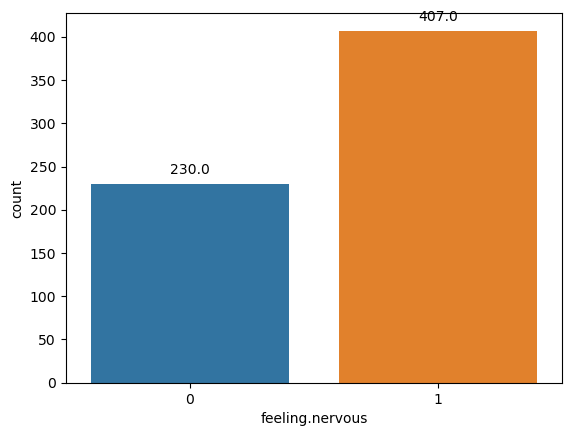

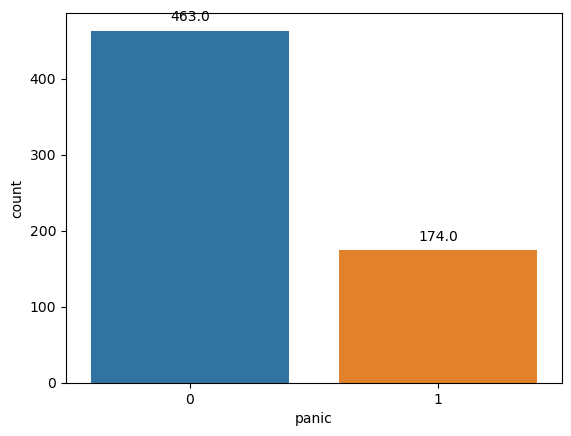

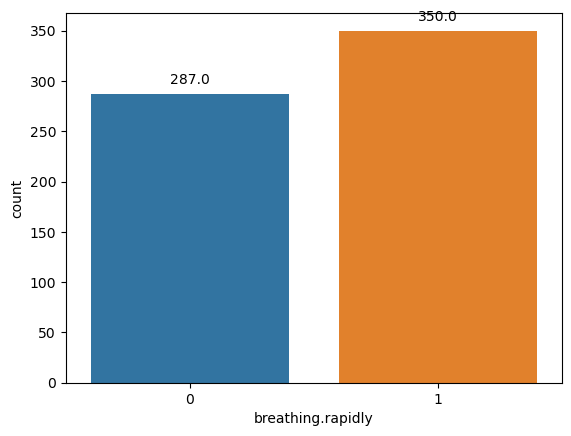

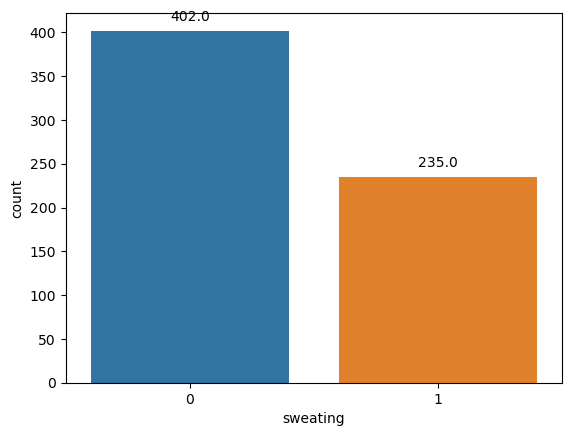

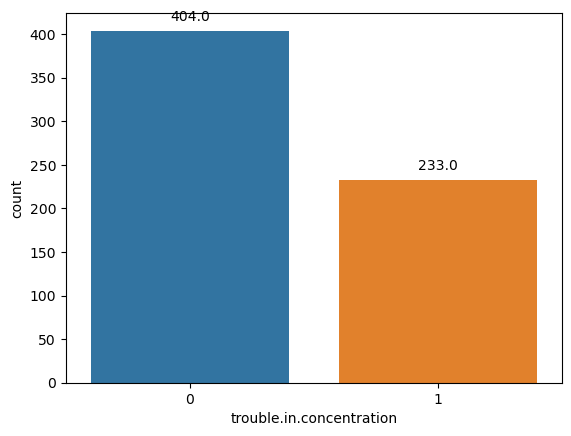

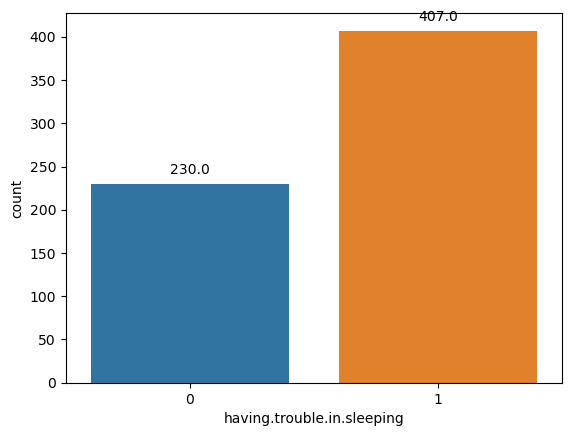

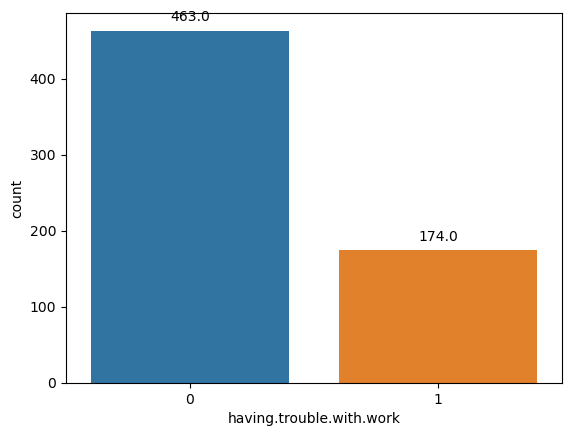

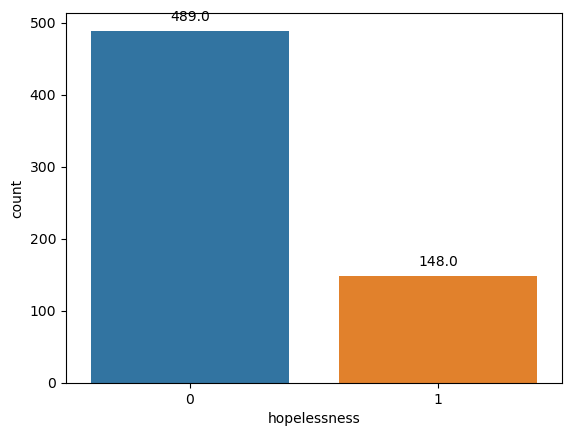

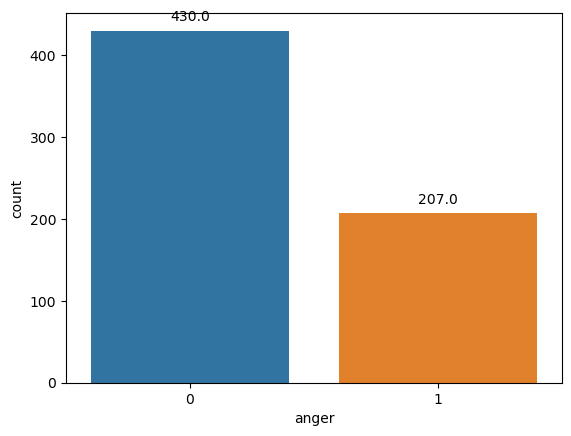

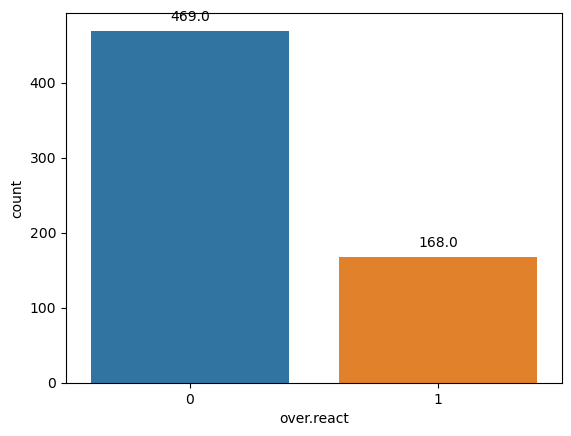

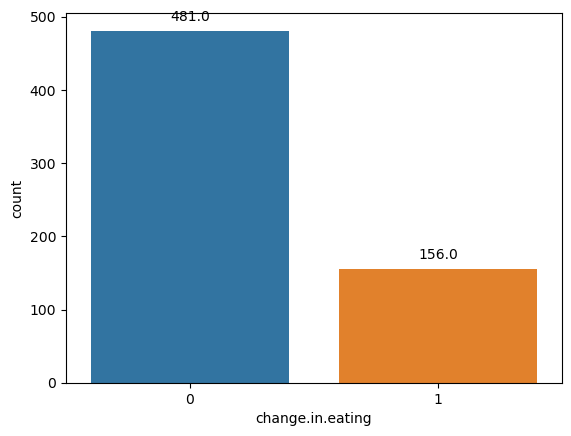

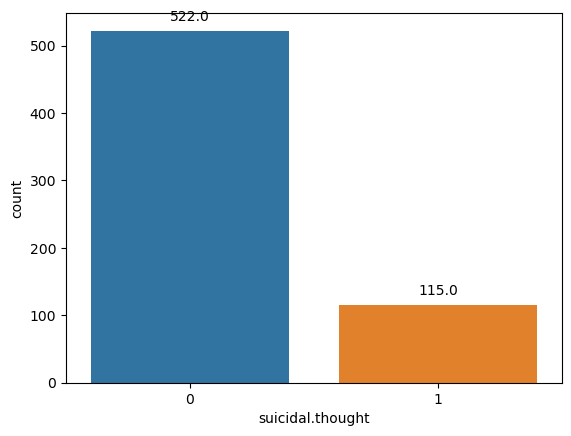

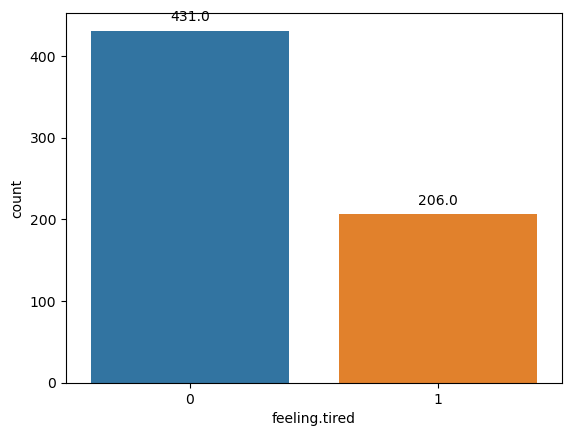

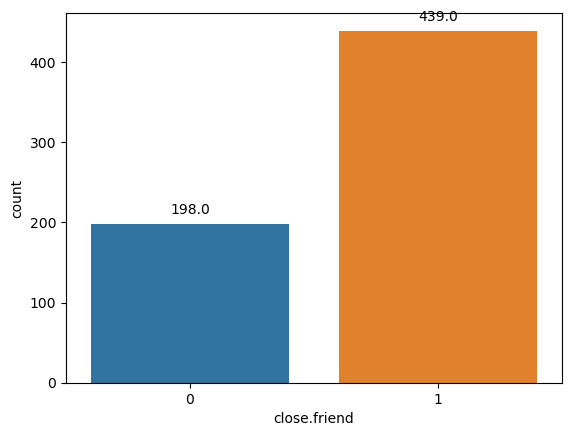

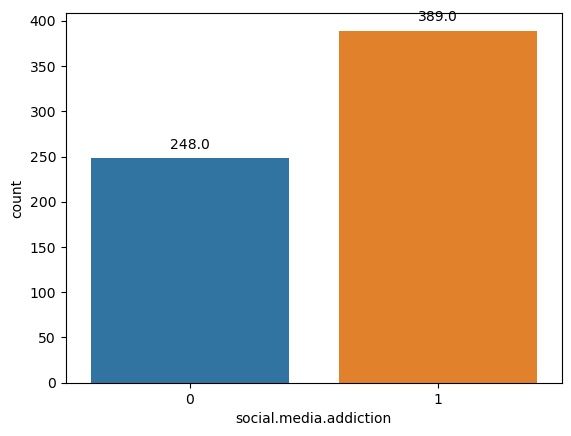

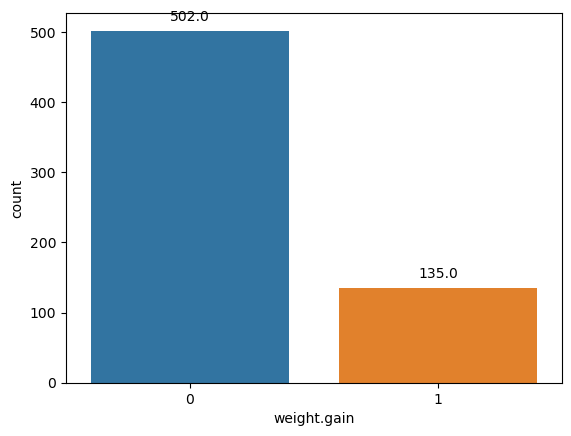

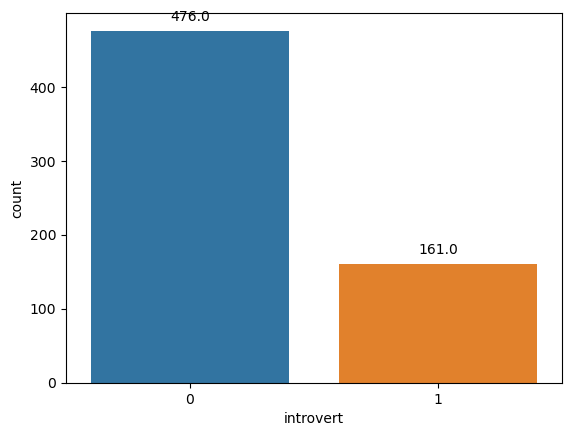

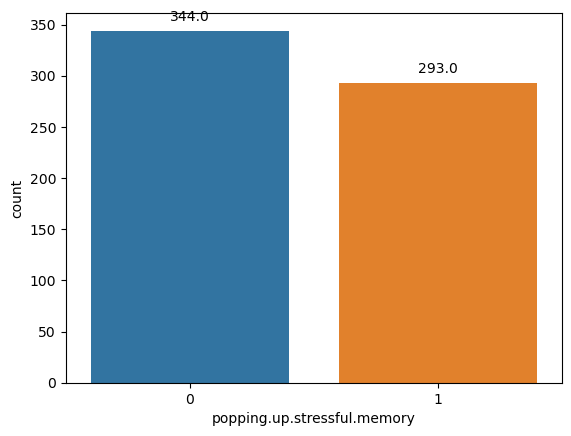

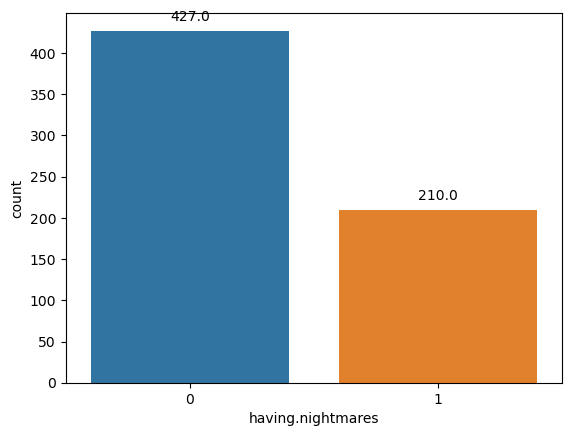

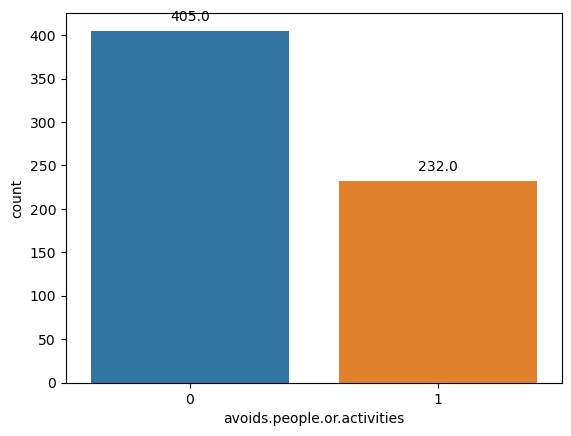

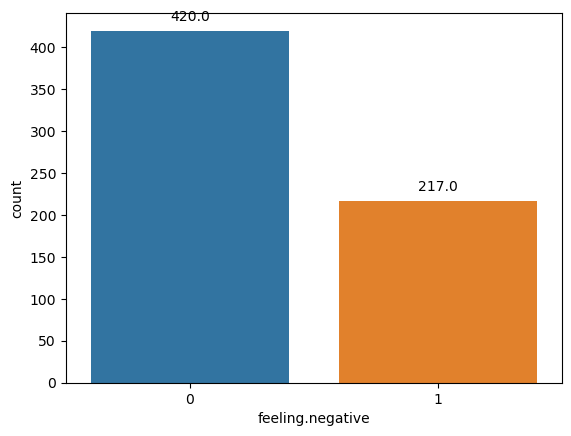

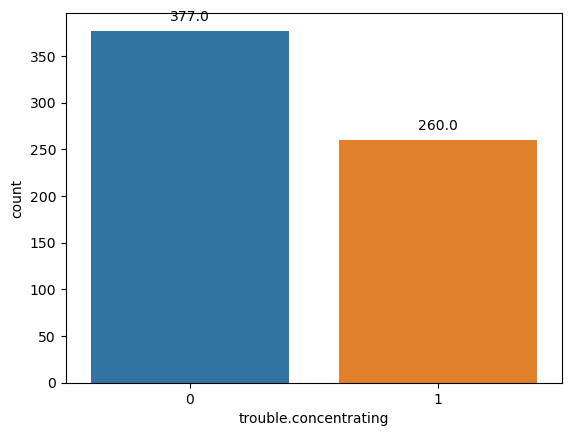

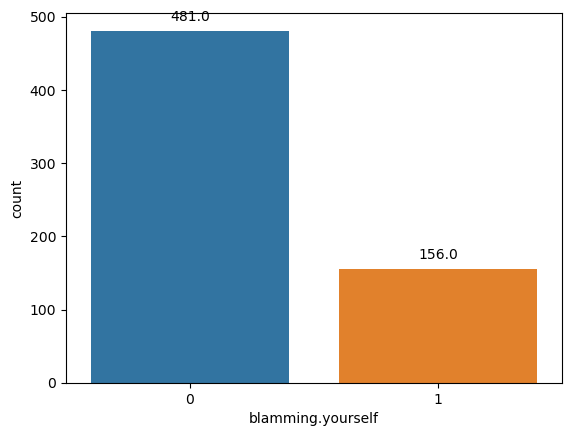

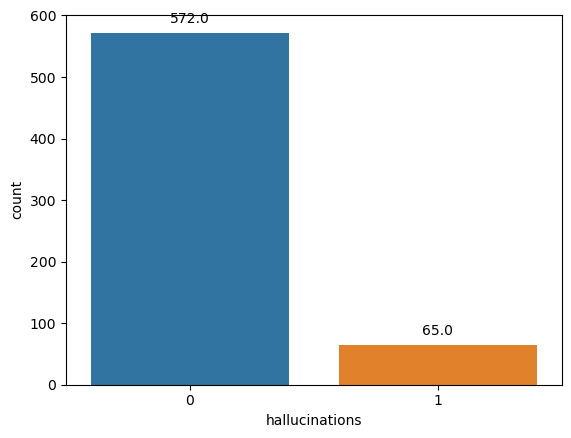

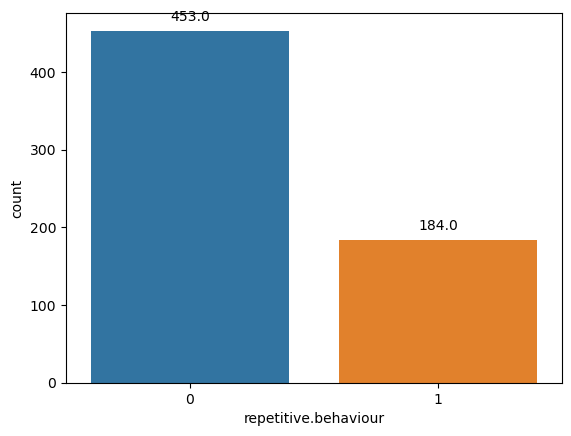

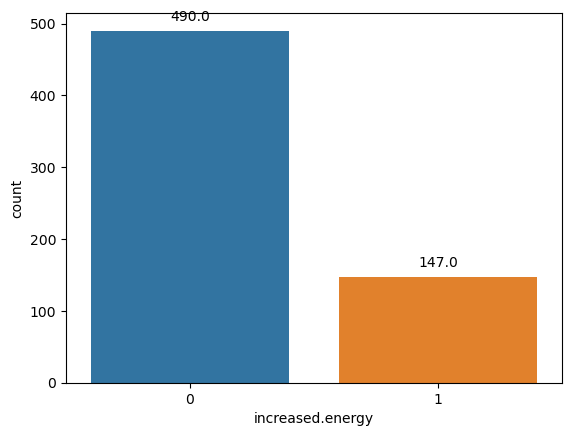

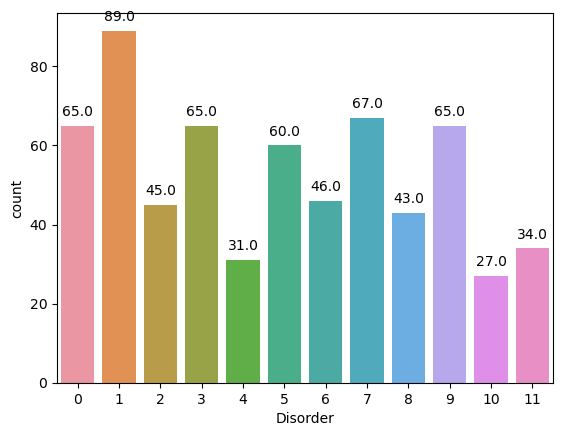

In [19]:
for i in mh_data.drop(["age", "seasonally"], axis=1).columns:
    ax = sns.countplot(data=mh_data, x=i)
    for p in ax.patches:
        ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', xytext=(0, 10), textcoords='offset points')
    plt.show()


{'ADHD': 0,
 'ASD': 1,
 'Loneliness': 2,
 'MDD': 3,
 'OCD': 4,
 'PDD': 5,
 'PTSD': 6,
 'anexiety': 7,
 'bipolar': 8,
 'eating disorder': 9,
 'psychotic deprission': 10,
 'sleeping disorder': 11}

<Axes: xlabel='Disorder', ylabel='age'>

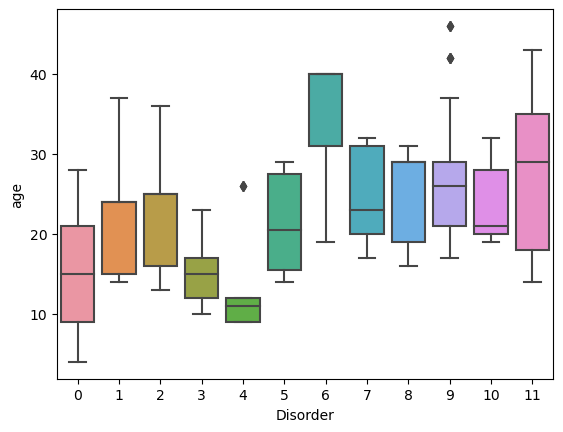

In [20]:
sns.boxplot(data=mh_data,x="Disorder",y="age")



{'ADHD': 0,
 'ASD': 1,
 'Loneliness': 2,
 'MDD': 3,
 'OCD': 4,
 'PDD': 5,
 'PTSD': 6,
 'anexiety': 7,
 'bipolar': 8,
 'eating disorder': 9,
 'psychotic deprission': 10,
 'sleeping disorder': 11}

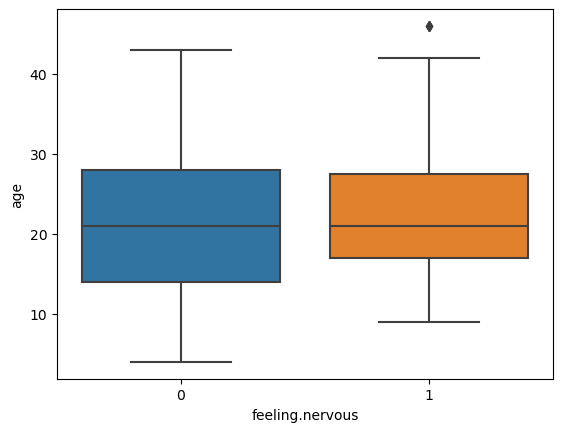

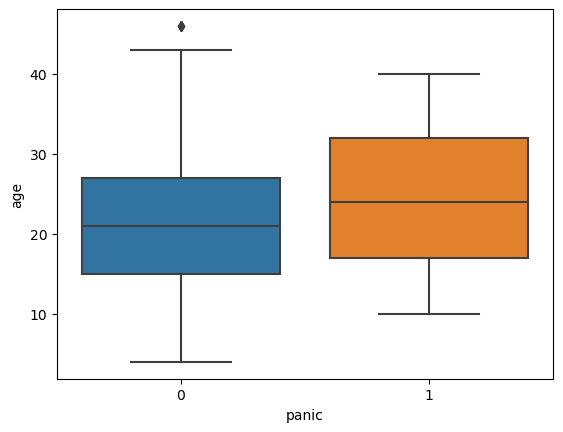

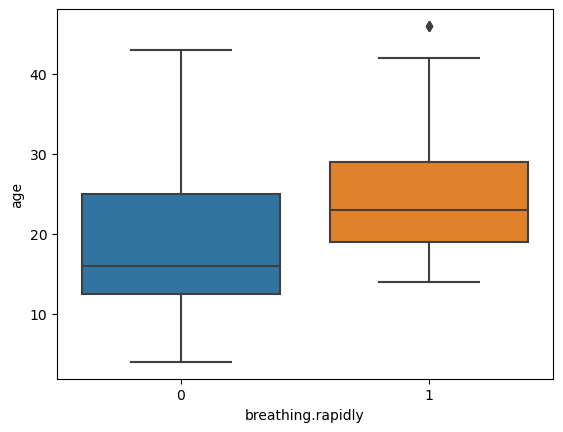

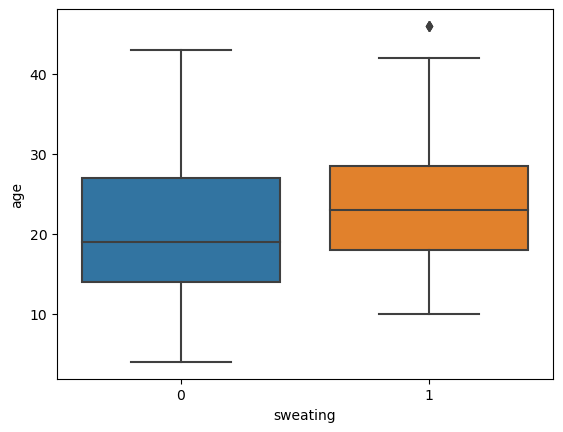

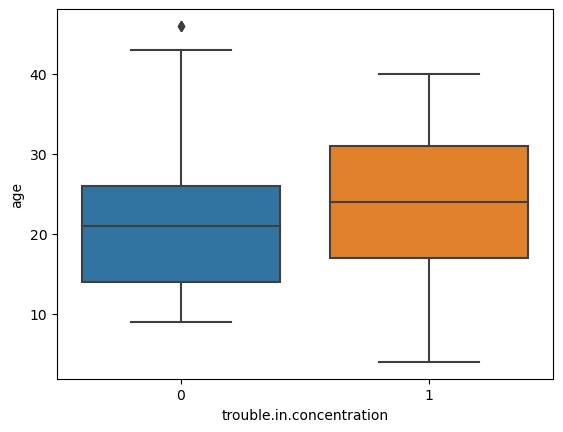

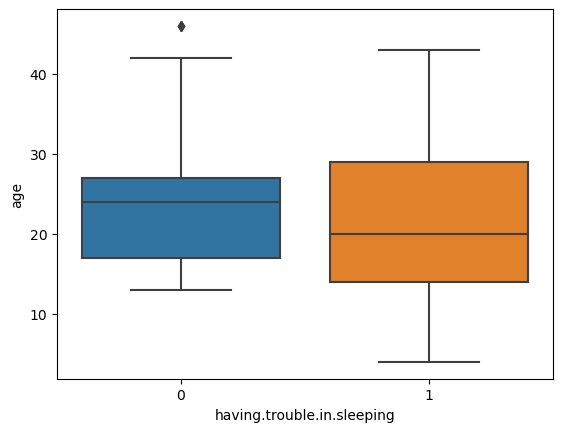

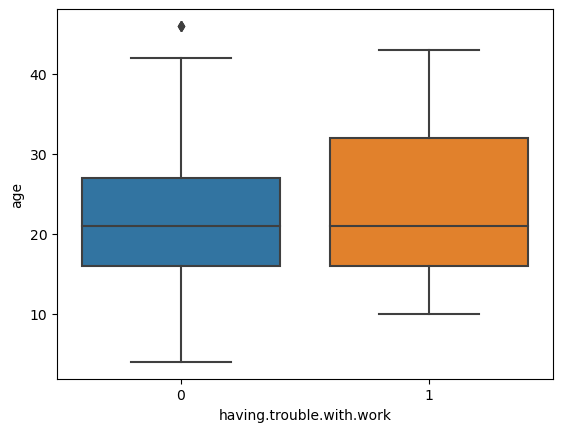

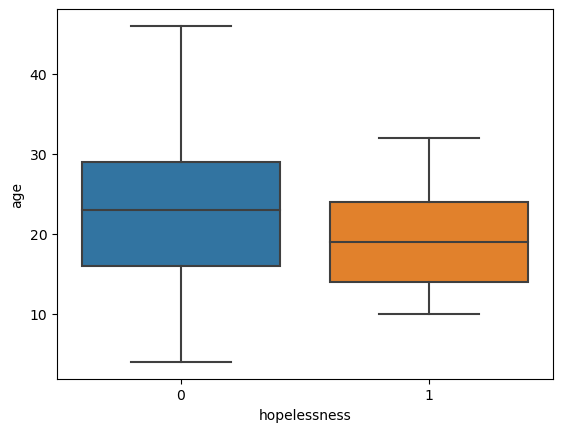

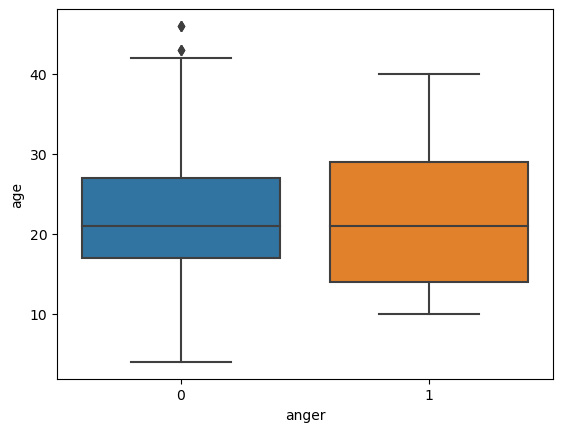

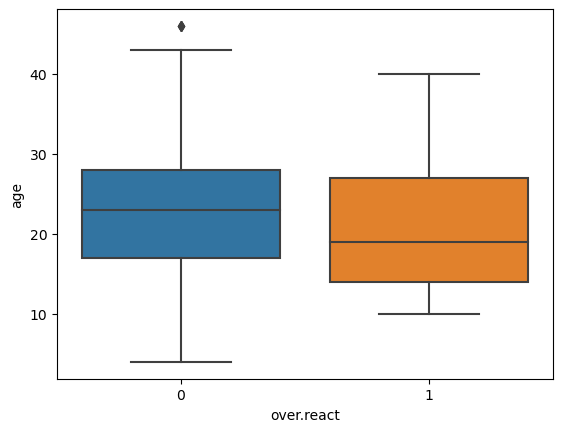

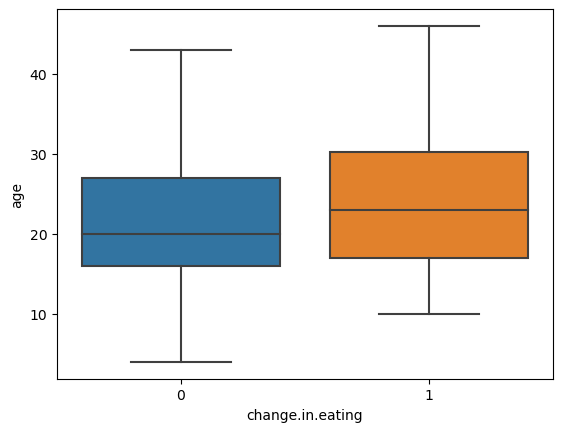

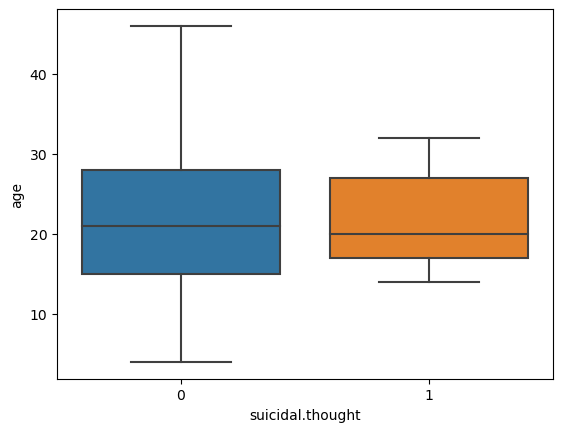

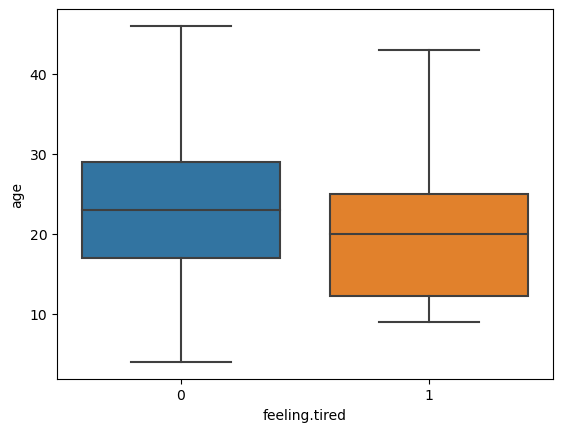

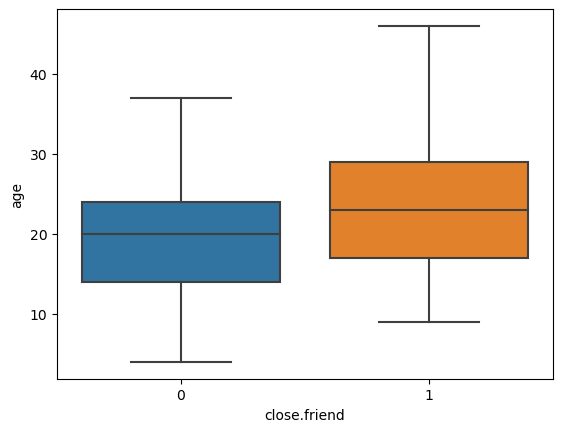

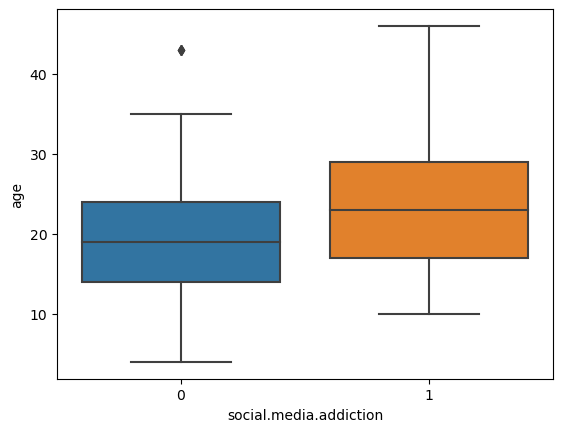

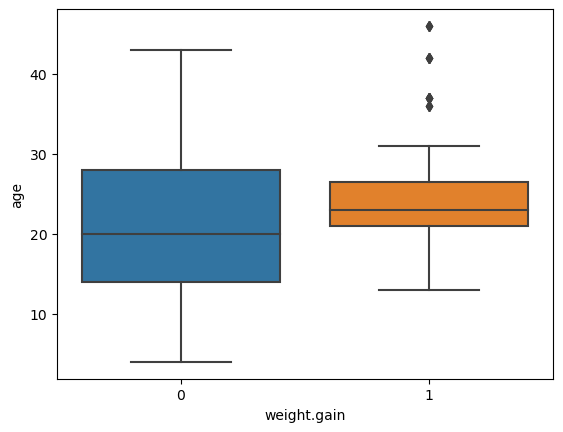

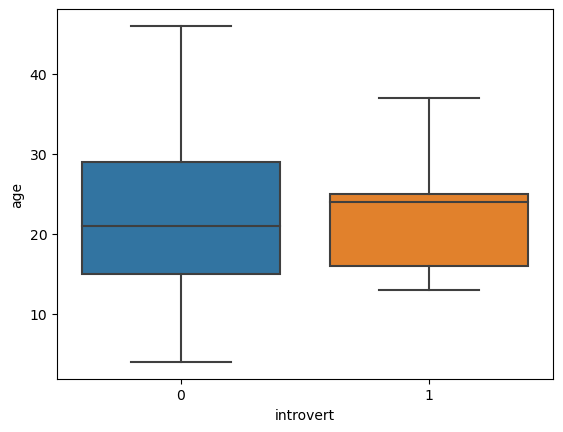

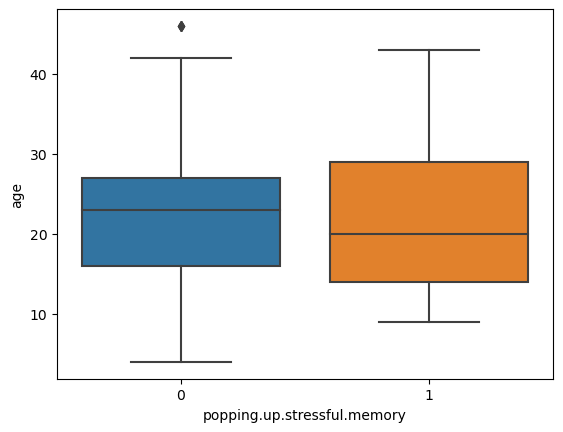

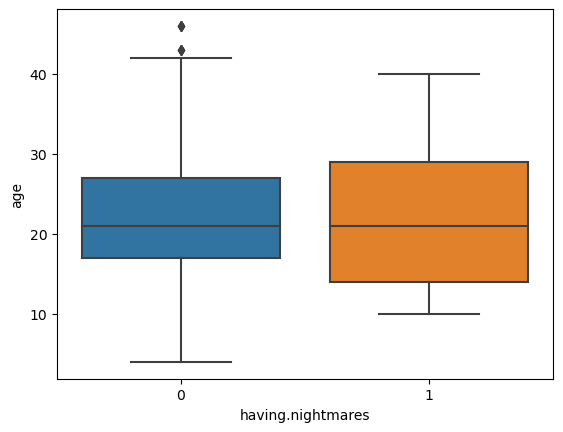

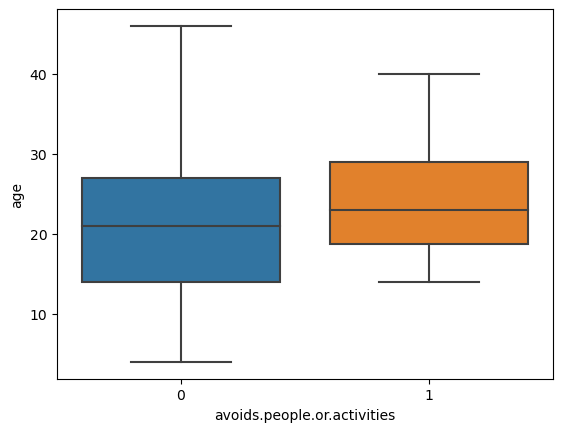

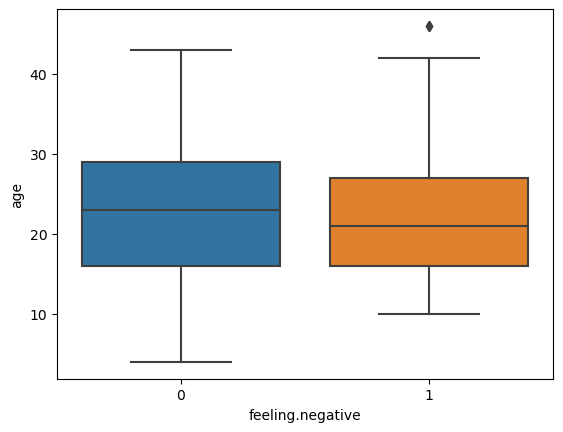

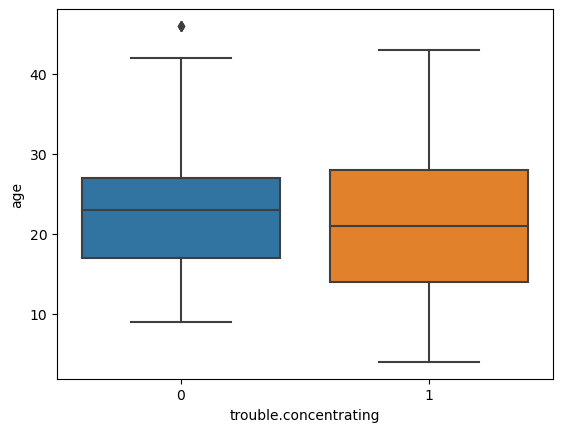

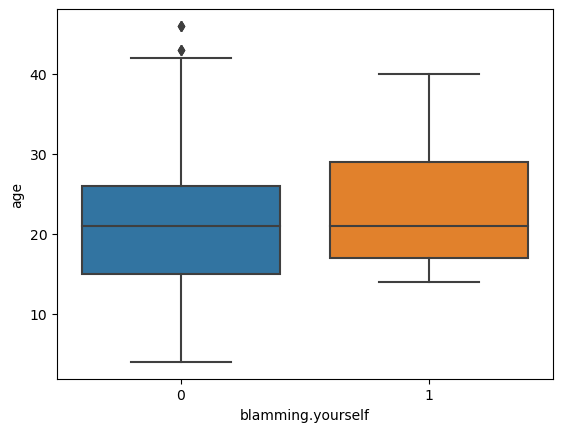

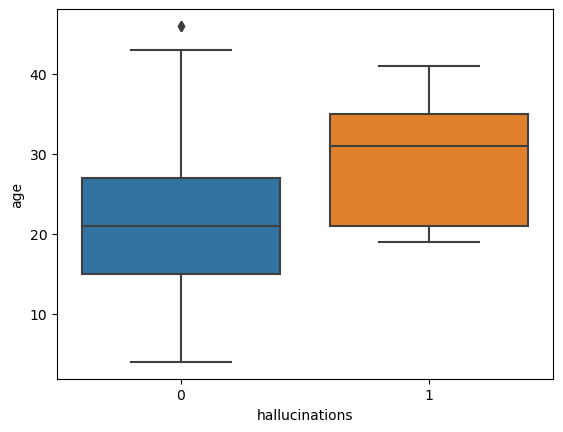

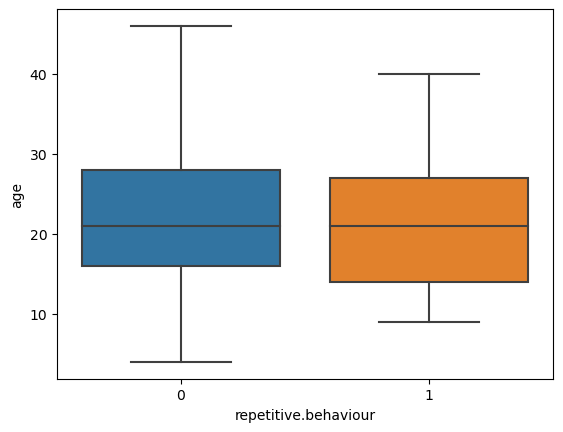

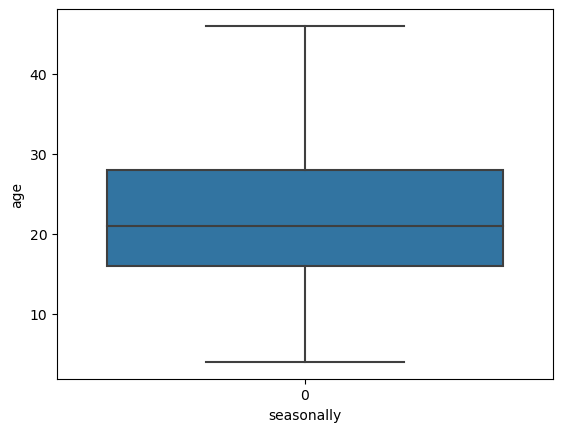

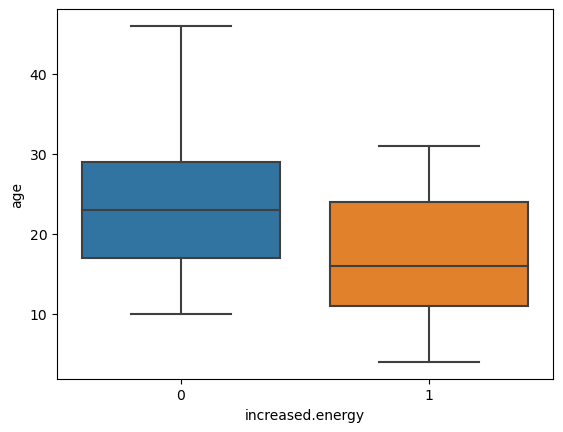

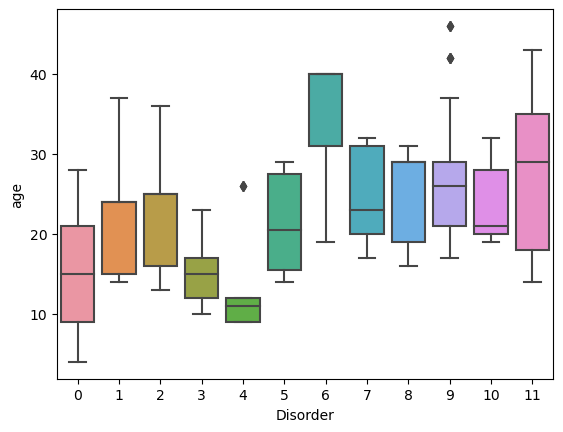

In [21]:
for i in mh_data.columns:
    if i != "age":
        sns.boxplot(data=mh_data,x=i,y="age")
        plt.show()

In [22]:
corr_mat=mh_data.corr()

In [23]:
corr_mat["Disorder"].sort_values()

repetitive.behaviour          -0.436700
introvert                     -0.359364
anger                         -0.281267
having.nightmares             -0.276968
increased.energy              -0.266135
over.react                    -0.135880
panic                         -0.097472
trouble.concentrating         -0.037389
trouble.in.concentration      -0.024673
avoids.people.or.activities    0.020256
hopelessness                   0.031710
change.in.eating               0.103943
suicidal.thought               0.109685
blamming.yourself              0.143633
having.trouble.in.sleeping     0.147985
social.media.addiction         0.174202
feeling.nervous                0.201767
feeling.tired                  0.203456
having.trouble.with.work       0.243128
weight.gain                    0.259186
sweating                       0.263341
feeling.negative               0.280811
popping.up.stressful.memory    0.283902
breathing.rapidly              0.291036
hallucinations                 0.333799


In [24]:
mh_data=mh_data.drop(["seasonally"],axis=1)

In [25]:
mh_data.shape

(637, 28)

In [26]:
mh_data.head()

,feeling.nervous,panic,breathing.rapidly,sweating,trouble.in.concentration,having.trouble.in.sleeping,having.trouble.with.work,hopelessness,anger,over.react,...,having.nightmares,avoids.people.or.activities,feeling.negative,trouble.concentrating,blamming.yourself,hallucinations,repetitive.behaviour,increased.energy,Disorder,age
0,1,0,1,0,0,1,0,1,0,0,...,0,0,1,0,0,0,0,0,3,23
1,1,0,1,0,0,1,0,0,1,1,...,1,1,0,0,0,0,1,0,1,14
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,25
3,1,0,0,0,1,1,0,0,0,1,...,0,0,0,1,1,0,0,1,8,29
4,1,1,1,1,1,1,1,0,0,0,...,0,1,0,0,0,0,0,0,7,32


In [27]:
mh_data_train,mh_data_test=train_test_split(mh_data,test_size=0.2,random_state=134)

In [28]:
mh_data_train["Disorder"].nunique()

12

In [29]:
mh_data_test["Disorder"].nunique()

12

In [30]:
X_train=mh_data_train.drop(["Disorder"],axis=1)
y_train=mh_data_train["Disorder"]
X_test=mh_data_test.drop(["Disorder"],axis=1)
y_test=mh_data_test["Disorder"]

In [31]:
dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)
y_dt_p=dt.predict(X_test)
print(accuracy_score(y_test,y_dt_p)*100)
print(confusion_matrix(y_test,y_dt_p))
print(classification_report(y_test,y_dt_p))

98.4375
[[13  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 25  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  7  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 17  0  1  0  0  0  0  0  0]
 [ 0  0  0  0  4  0  0  0  0  0  0  0]
 [ 0  0  0  1  0 11  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 13  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 17  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  1  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 13  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  2  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  3]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00        25
           2       1.00      1.00      1.00         7
           3       0.94      0.94      0.94        18
           4       1.00      1.00      1.00         4
           5       0.92      0.92      0.92        12
           6       1.00      1.00      1.00        13
           7       1.00      1.00      1.00        17
           8       1.00      1.00   

In [32]:
svc=SVC(kernel="poly",random_state=13)
svc.fit(X_train,y_train)
y_svc_p=svc.predict(X_test)
print(accuracy_score(y_test,y_svc_p)*100)
print(confusion_matrix(y_test,y_svc_p))
print(classification_report(y_test,y_svc_p))

66.40625
[[13  0  0  0  0  0  0  0  0  0  0  0]
 [ 9 16  0  0  0  0  0  0  0  0  0  0]
 [ 4  0  3  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 15  0  3  0  0  0  0  0  0]
 [ 4  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  7  0  5  0  0  0  0  0  0]
 [ 0  2  0  1  0  0  8  0  0  0  0  2]
 [ 5  0  0  1  0  0  0 11  0  0  0  0]
 [ 1  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  0  0  0  0  0  0  0  0 12  0  0]
 [ 0  0  0  1  0  0  0  0  0  0  1  0]
 [ 2  0  0  0  0  0  0  0  0  0  0  1]]
              precision    recall  f1-score   support

           0       0.33      1.00      0.50        13
           1       0.89      0.64      0.74        25
           2       1.00      0.43      0.60         7
           3       0.60      0.83      0.70        18
           4       0.00      0.00      0.00         4
           5       0.62      0.42      0.50        12
           6       1.00      0.62      0.76        13
           7       1.00      0.65      0.79        17
           8       0.00      0.00  

c:\Users\elige\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\elige\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\elige\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [33]:
# Convert DataFrames to NumPy arrays
X_train_np = X_train.values
X_test_np = X_test.values

# Convert labels to NumPy array if not already
y_train_np = y_train.values
y_test_np = y_test.values

# Initialize and fit the model
knn = KNeighborsClassifier(n_neighbors=12,weights="uniform",algorithm="ball_tree")
knn.fit(X_train_np, y_train_np)

# Predict and evaluate
y_knn_p = knn.predict(X_test_np)
print(accuracy_score(y_test_np, y_knn_p) * 100)
print(confusion_matrix(y_test_np, y_knn_p))
print(classification_report(y_test,y_knn_p))

89.0625
[[13  0  0  0  0  0  0  0  0  0  0  0]
 [ 1 23  0  0  0  0  0  1  0  0  0  0]
 [ 0  0  7  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 15  0  1  0  2  0  0  0  0]
 [ 0  0  0  0  4  0  0  0  0  0  0  0]
 [ 0  0  0  1  0 11  0  0  0  0  0  0]
 [ 0  2  0  0  0  0 10  1  0  0  0  0]
 [ 0  0  0  0  0  0  0 16  0  1  0  0]
 [ 0  0  0  0  0  0  0  0  1  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 12  0  1]
 [ 0  0  0  0  0  0  0  1  0  0  1  0]
 [ 1  0  0  0  0  0  0  1  0  0  0  1]]
              precision    recall  f1-score   support

           0       0.87      1.00      0.93        13
           1       0.92      0.92      0.92        25
           2       1.00      1.00      1.00         7
           3       0.94      0.83      0.88        18
           4       1.00      1.00      1.00         4
           5       0.92      0.92      0.92        12
           6       1.00      0.77      0.87        13
           7       0.73      0.94      0.82        17
           8       1.00      1.00   

In [34]:
mnb=MultinomialNB()
mnb.fit(X_train,y_train)
y_mnb_p=mnb.predict(X_test)
print(accuracy_score(y_test,y_mnb_p)*100)
print(confusion_matrix(y_test,y_mnb_p))
print(classification_report(y_test,y_mnb_p))

93.75
[[13  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 25  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  7  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 12  0  6  0  0  0  0  0  0]
 [ 0  0  0  0  4  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 12  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 11  0  0  0  0  2]
 [ 0  0  0  0  0  0  0 17  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  1  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 13  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  2  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  3]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00        25
           2       1.00      1.00      1.00         7
           3       1.00      0.67      0.80        18
           4       1.00      1.00      1.00         4
           5       0.67      1.00      0.80        12
           6       1.00      0.85      0.92        13
           7       1.00      1.00      1.00        17
           8       1.00      1.00     

In [35]:
X_train.columns

Index(['feeling.nervous', 'panic', 'breathing.rapidly', 'sweating',
       'trouble.in.concentration', 'having.trouble.in.sleeping',
       'having.trouble.with.work', 'hopelessness', 'anger', 'over.react',
       'change.in.eating', 'suicidal.thought', 'feeling.tired', 'close.friend',
       'social.media.addiction', 'weight.gain', 'introvert',
       'popping.up.stressful.memory', 'having.nightmares',
       'avoids.people.or.activities', 'feeling.negative',
       'trouble.concentrating', 'blamming.yourself', 'hallucinations',
       'repetitive.behaviour', 'increased.energy', 'age'],
      dtype='object')

In [36]:
X_train.describe()

,feeling.nervous,panic,breathing.rapidly,sweating,trouble.in.concentration,having.trouble.in.sleeping,having.trouble.with.work,hopelessness,anger,over.react,...,popping.up.stressful.memory,having.nightmares,avoids.people.or.activities,feeling.negative,trouble.concentrating,blamming.yourself,hallucinations,repetitive.behaviour,increased.energy,age
count,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,...,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000
mean,0.622790,0.251473,0.534381,0.355599,0.361493,0.654224,0.267191,0.231827,0.310413,0.255403,...,0.457760,0.312377,0.355599,0.337917,0.406680,0.253438,0.108055,0.277014,0.245580,22.392927
std,0.485165,0.434287,0.499307,0.479165,0.480906,0.476089,0.442928,0.422414,0.463118,0.436516,...,0.498703,0.463919,0.479165,0.473466,0.491697,0.435408,0.310755,0.447964,0.430854,8.493098
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,16.000000
50%,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,21.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,29.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,46.000000


In [38]:
import joblib

# Save the model
joblib.dump(dt, 'disorderModel.joblib')


['disorderModel.joblib']